In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import statsmodels.api as sm

In [2]:
dane_leki = pd.read_excel('dane_leki.xlsx')
dane_leki = dane_leki.drop("Unnamed: 0",axis=1)


In [3]:
dane_leki.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
0,acetaminophen,-0.79,-0.63,2,0,2,t
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t
2,bromazepam,0.38,0.57,1,0,3,t
3,carbamazepine,0.69,0.68,0,0,3,t
4,chlorpromazine,1.18,1.50,0,0,2,t


In [4]:
correla  = dane_leki.corr()
correla 

,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logK HSA,1.000000,0.799757,-0.720084,0.598914,-0.306897
logKCTAB,0.799757,1.000000,-0.633481,0.446144,-0.135951
CATS3D_00_DD,-0.720084,-0.633481,1.000000,-0.291248,0.290864
CATS3D_09_AL,0.598914,0.446144,-0.291248,1.000000,0.326375
CATS3D_00_AA,-0.306897,-0.135951,0.290864,0.326375,1.000000


CORRELATION 

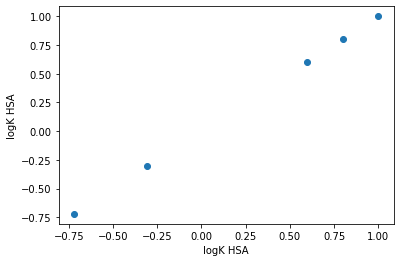

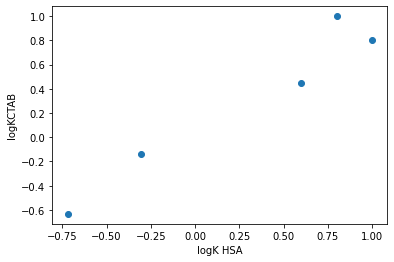

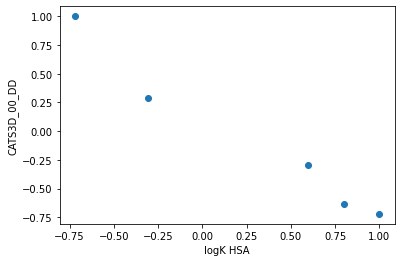

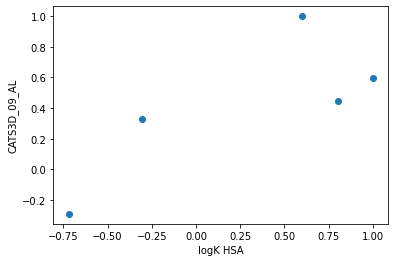

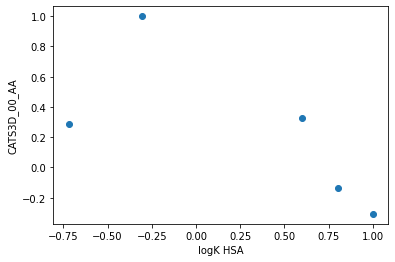

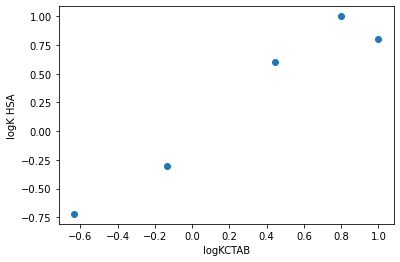

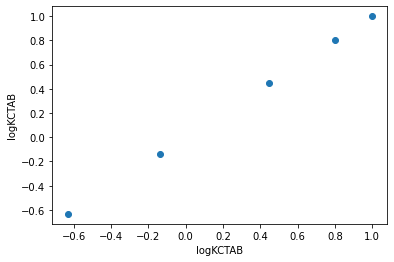

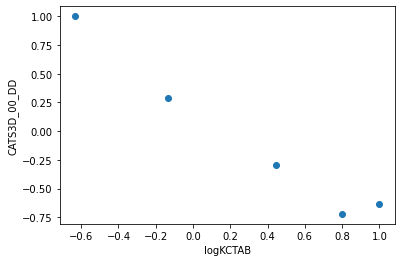

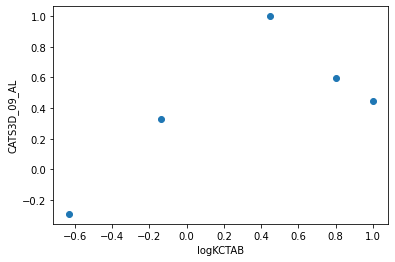

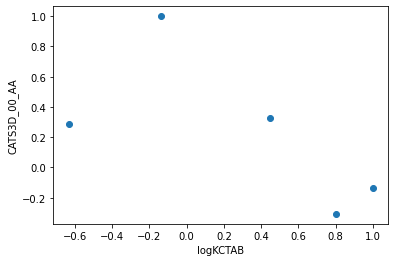

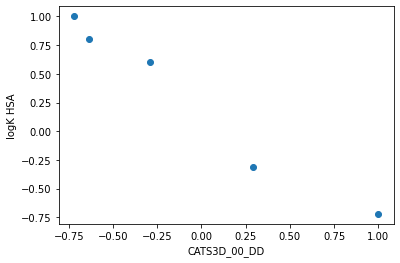

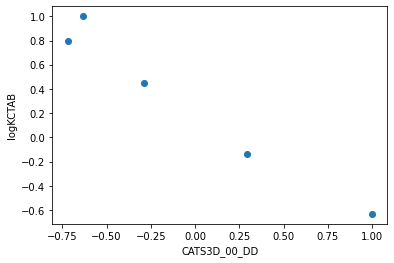

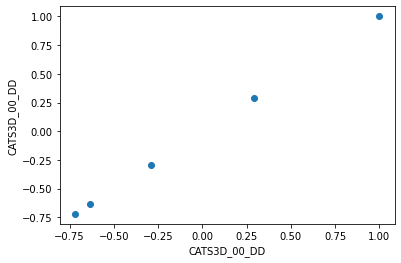

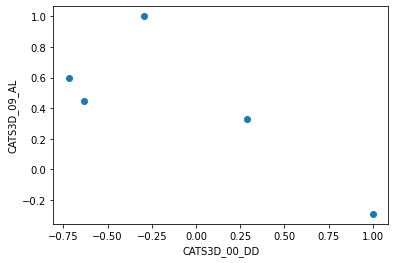

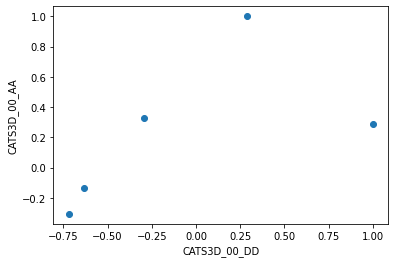

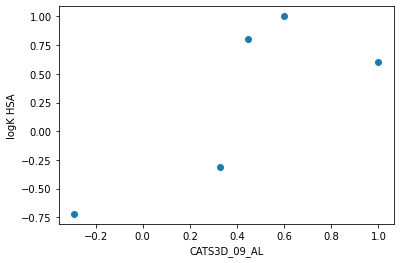

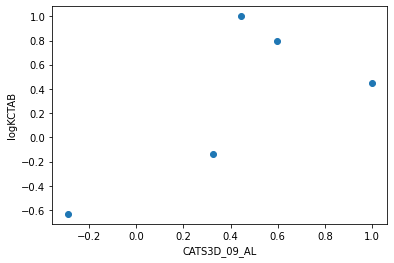

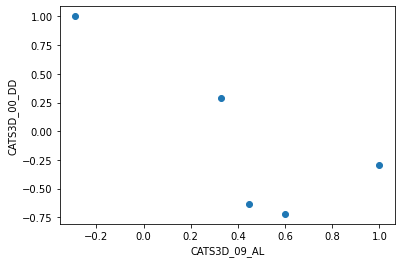

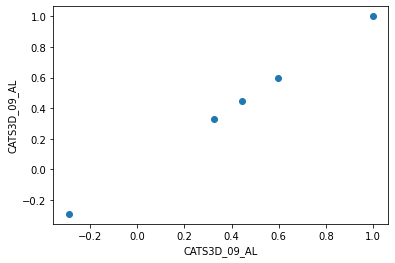

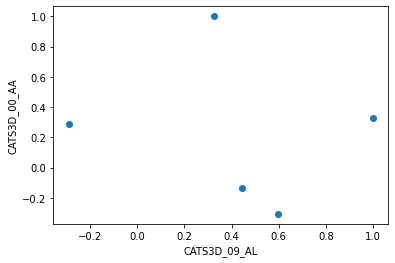

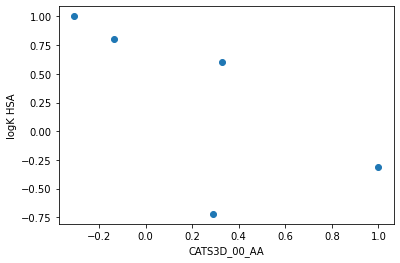

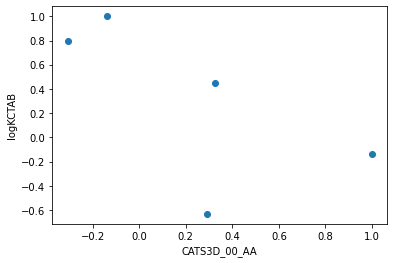

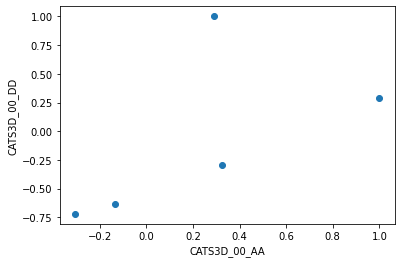

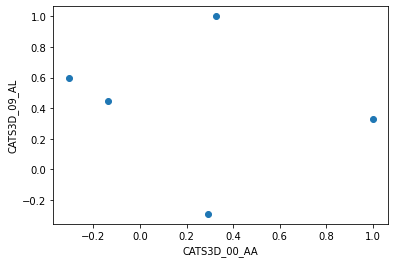

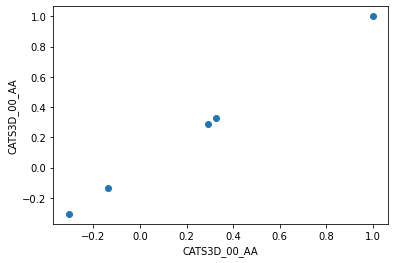

In [5]:
list_of_names = list(correla)
for col_name in list_of_names:
    for i,col_name_y in enumerate(list_of_names):
        x = correla.get(col_name) 
        y = correla.iloc[i]
        plt.scatter(x,y)
        plt.xlabel(col_name)
        plt.ylabel(col_name_y)
        plt.show()


HEATMAP

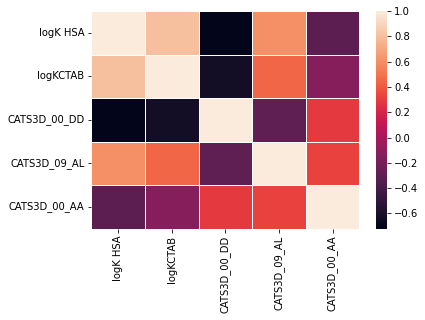

In [6]:
ax = sns.heatmap(correla, linewidth=0.5)
plt.show()

RÓWNANIE MODELU 

In [7]:
treningowe = dane_leki[dane_leki['Zbiór']=='t']

In [8]:
treningowe.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór
0,acetaminophen,-0.79,-0.63,2,0,2,t
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t
2,bromazepam,0.38,0.57,1,0,3,t
3,carbamazepine,0.69,0.68,0,0,3,t
4,chlorpromazine,1.18,1.50,0,0,2,t


R^2

In [9]:
X = pd.DataFrame(treningowe[['logKCTAB','CATS3D_00_DD','CATS3D_09_AL','CATS3D_00_AA']])
Y = pd.DataFrame(treningowe['logK HSA'])
X = sm.add_constant(X)
statOLS = sm.OLS(Y,X).fit()
print(statOLS.summary())


                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     14.23
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.72e-05
Time:                        14:21:46   Log-Likelihood:                -10.796
No. Observations:                  19   AIC:                             31.59
Df Residuals:                      14   BIC:                             36.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8050      0.421      1.914   

c:\Users\Michał\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


RÓWNANIE MODELU

równanie_modelu=0.8050+0.4722*logKCTAB +(-0.2161 )*CATS3D_00_DD+0.3232 *CATS3D_09_AL+-0.2253*CATS3D_00_AA

In [10]:
y_pred = 0.8050 + 0.4722*dane_leki['logKCTAB'] + (-0.2161 * dane_leki['CATS3D_00_DD']+0.3232*dane_leki['CATS3D_09_AL']+ (-0.2253*dane_leki['CATS3D_00_AA']))
y_pred
dane_leki['y_pred'] = y_pred
dane_leki

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór,y_pred
0,acetaminophen,-0.79,-0.63,2,0,2,t,-0.375286
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t,0.263784
2,bromazepam,0.38,0.57,1,0,3,t,0.182154
3,carbamazepine,0.69,0.68,0,0,3,t,0.450196
4,chlorpromazine,1.18,1.50,0,0,2,t,1.062700
5,clonidine,-0.42,0.26,2,0,1,t,0.270272
6,diazepam,1.08,1.25,0,0,3,t,0.719350
7,diltiazem,0.06,1.09,0,3,6,t,0.937498
8,diphenhydramine,0.08,0.46,0,0,2,t,0.571612
9,fluoxetine,1.39,0.73,1,0,1,t,0.708306


RMSE_c - treningowy


In [11]:
logKHSA = dane_leki['logK HSA']
MSE = np.square(np.subtract(logKHSA[dane_leki['Zbiór']=='t'],y_pred[dane_leki['Zbiór'] == 't'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4271069323369919


RMSE_ex - testowy 

In [12]:
logKHSA = dane_leki['logK HSA']
MSE = np.square(np.subtract(logKHSA[dane_leki['Zbiór']=='w'],y_pred[dane_leki['Zbiór'] == 'w'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.30141347956420267


Q_2ex


In [13]:
def Q_2():
    y_pred_w = y_pred[dane_leki['Zbiór']=='w']
    mean_pred = y_pred_w.mean()
    licznik__ = y_pred_w[dane_leki['Zbiór']=='w'] - logKHSA[dane_leki['Zbiór']=='w']
    licznik = sum(licznik__**2)
    mianownik__ = y_pred_w - mean_pred
    mianownik = sum(mianownik__**2)
    return 1 - (licznik / mianownik)

In [14]:
Q_2()

0.9489689299070292

WYKRES WILLIAMSA

In [15]:
h = 3*(4 + 1) / 19 # bo ze zbioru t
h

0.7894736842105263

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [17]:
X_ols = treningowe[["logKCTAB","CATS3D_00_DD",'CATS3D_09_AL','CATS3D_00_AA']]
Y_ols = treningowe[['logK HSA']] 

In [18]:
X = X_ols
y = Y_ols


# generate OLS model
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

In [19]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     14.23
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.72e-05
Time:                        14:21:48   Log-Likelihood:                -10.796
No. Observations:                  19   AIC:                             31.59
Df Residuals:                      14   BIC:                             36.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8050      0.421      1.914   

c:\Users\Michał\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Williams

In [20]:
X_ols = dane_leki[["logKCTAB","CATS3D_00_DD",'CATS3D_09_AL','CATS3D_00_AA']]
Y_ols = dane_leki[['logK HSA']] 

In [21]:
X = X_ols
y = Y_ols


# generate OLS model
model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

In [22]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
# plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
#                           lowess=True,
#                           scatter_kws={'alpha': 0.5},
#                           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

IndexError: list index out of range

<Figure size 576x396 with 0 Axes>

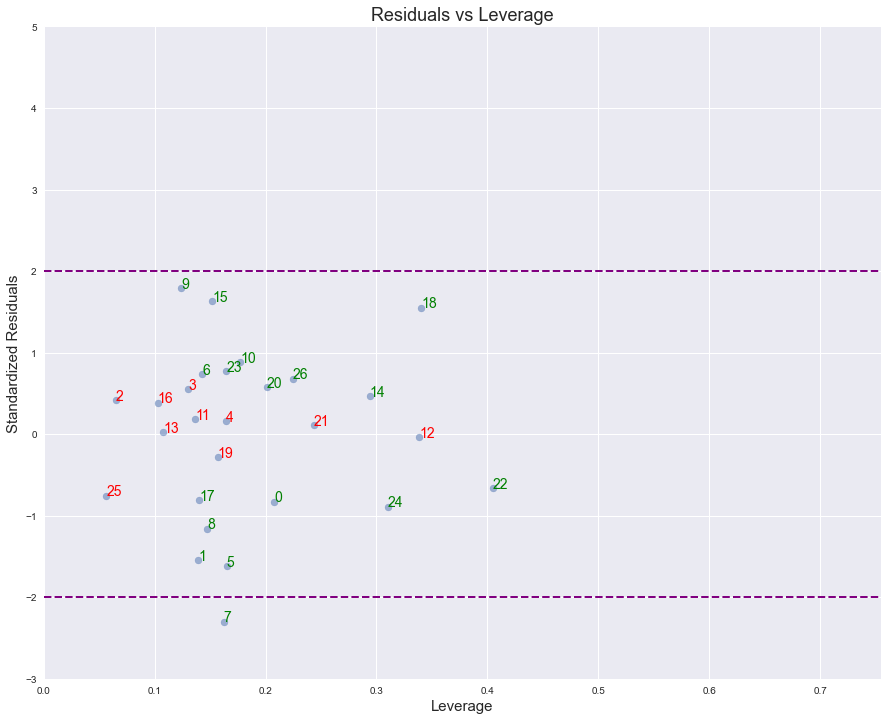

In [23]:
xs = np.linspace(1, 21, 200)
plot_lm_4 = plt.figure(figsize=(15,12));
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
plt.hlines(y=[-2, 0, -2], xmin=[0, 25, 50], xmax=[len(xs)], colors='purple', linestyles='--', lw=2, label='Multiple Lines')
plt.hlines(y=[2, 0, -2], xmin=[0, 25, 50], xmax=[len(xs)], colors='purple', linestyles='--', lw=2, label='Multiple Lines')
plt.axvline(x=h)
#sns.regplot(model_leverage, model_norm_residuals,
#            scatter=False,
#            ci=False,
#            lowess=True,
#            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.35)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:]
for x,i in enumerate(leverage_top_3):
    if x<17:
        plot_lm_4.axes[0].annotate(i,
                                xy=(model_leverage[i],
                                    model_norm_residuals[i]),color='green')
    else: 
        plot_lm_4.axes[0].annotate(i,
                               xy=(model_leverage[i],
                                   model_norm_residuals[i]),color='red')

PCA

In [24]:
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [25]:
dane_leki.head()

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór,y_pred
0,acetaminophen,-0.79,-0.63,2,0,2,t,-0.375286
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t,0.263784
2,bromazepam,0.38,0.57,1,0,3,t,0.182154
3,carbamazepine,0.69,0.68,0,0,3,t,0.450196
4,chlorpromazine,1.18,1.50,0,0,2,t,1.062700


In [26]:
zmienne_zalezne = dane_leki.iloc[:,1]
zmienne_niezalezne = dane_leki.iloc[:,2:6]

In [27]:
zmienne_niezalezne

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
0,-0.63,2,0,2
1,1.22,1,0,4
2,0.57,1,0,3
3,0.68,0,0,3
4,1.50,0,0,2
5,0.26,2,0,1
6,1.25,0,0,3
7,1.09,0,3,6
8,0.46,0,0,2
9,0.73,1,0,1


In [28]:
pca = PCA()
dane_fitransformmed = pca.fit_transform(zmienne_niezalezne)
dane_fitransformmed

array([[-2.30069689, -0.64995536, -0.94942897, -0.77936406],
       [-0.69609081, -0.55355085,  1.0299943 ,  0.6063953 ],
       [-1.49255833, -0.24136433,  0.47664118, -0.01366872],
       [-1.50687237,  0.34610715,  1.25036455, -0.27467546],
       [-2.21652612,  1.10365714,  1.02774028,  0.46380134],
       [-3.00621666,  0.12880242, -1.15630425,  0.02380517],
       [-1.47320989,  0.51879911,  1.37860635,  0.25210567],
       [ 2.73902658,  0.69723128,  1.14828475, -0.19261657],
       [-2.27794539,  0.78857006,  0.79375524, -0.49734319],
       [-2.99927018,  0.8253425 , -0.30158606,  0.0955023 ],
       [-0.25122452,  2.28861872, -1.14814525,  0.42535881],
       [-2.27144912,  0.82189658,  0.81850366, -0.39568367],
       [ 4.92736781,  0.38190869,  1.57836698,  0.08821003],
       [ 0.49504456,  1.7189091 , -0.78602991,  0.25987202],
       [ 0.71154566, -2.7894284 ,  0.60252579, -1.01618963],
       [-0.00564514, -2.73144817, -0.47706652, -0.35865173],
       [-2.24577389, -0.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(dane_fitransformmed,zmienne_zalezne,test_size=0.33, random_state=42)


In [30]:
from sklearn.model_selection import KFold
dane_kfold = KFold(n_splits=10,shuffle=True, random_state=1)

In [31]:
X_train

array([[ 1.40781208, -0.97115658, -0.98211878,  1.20689432],
       [-0.69609081, -0.55355085,  1.0299943 ,  0.6063953 ],
       [-2.21652612,  1.10365714,  1.02774028,  0.46380134],
       [-3.00621666,  0.12880242, -1.15630425,  0.02380517],
       [-1.49255833, -0.24136433,  0.47664118, -0.01366872],
       [-0.00564514, -2.73144817, -0.47706652, -0.35865173],
       [ 0.98374023,  3.79412977, -1.50493414, -0.83931515],
       [-1.50687237,  0.34610715,  1.25036455, -0.27467546],
       [ 0.55791254,  0.38872619, -0.08251911, -0.32333772],
       [ 2.68279522,  1.40055683, -0.35819754,  0.53145684],
       [ 4.68351787,  2.43633782, -0.27862583, -0.59372537],
       [ 1.52232722, -3.68908639,  0.38215554, -0.13511886],
       [-0.78095024,  1.32471766,  1.07095874,  0.80845522],
       [ 2.73902658,  0.69723128,  1.14828475, -0.19261657],
       [-0.25122452,  2.28861872, -1.14814525,  0.42535881],
       [ 0.71154566, -2.7894284 ,  0.60252579, -1.01618963],
       [ 0.78314498, -3.

([<matplotlib.axis.XTick at 0x1347d6c7910>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

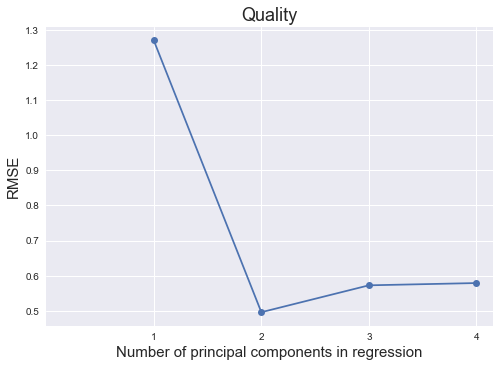

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression().fit(X_train,y_train)
rmse_list = []

for i in range(1, X_train.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=dane_kfold, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train.shape[1]), np.arange(1, X_train.shape[1]+1))

In [33]:
#Optymalna ilość składowych na podstawie wykresu zależności RMSE od ilości głównych składowych z uwzględnieniem walidacji krzyżowej K-FOLD wynosi 2 

In [34]:
my_array = X_train

X_train_pd = pd.DataFrame(my_array, columns = ['logKCTAB','CATS3D_00_DD','CATS3D_09_AL', 'CATS3D_00_AA'])

X_train_pd.head()

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
0,1.407812,-0.971157,-0.982119,1.206894
1,-0.696091,-0.553551,1.029994,0.606395
2,-2.216526,1.103657,1.027740,0.463801
3,-3.006217,0.128802,-1.156304,0.023805
4,-1.492558,-0.241364,0.476641,-0.013669


In [35]:
X_train_corr = X_train_pd.corr()
X_train_corr

,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA
logKCTAB,1.000000,0.067918,-0.204927,-0.230498
CATS3D_00_DD,0.067918,1.000000,-0.213017,0.040158
CATS3D_09_AL,-0.204927,-0.213017,1.000000,0.079211
CATS3D_00_AA,-0.230498,0.040158,0.079211,1.000000


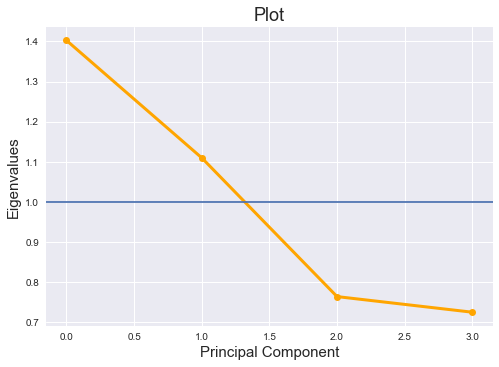

In [36]:
from numpy.linalg import eig


values, vectors = eig(X_train_corr)

values[2], values[3] = values[3],values[2]
vectors[2], vectors[3] = vectors[3],vectors[2]
val = pd.DataFrame(values, columns=['w.wlasne']) 

plt.plot(val, 'o-', linewidth=3, color='orange')
plt.axhline(1)
plt.title('Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

In [37]:
values, vectors

(array([1.40259669, 1.10956352, 0.76340058, 0.72443921]),
 array([[ 0.59630072,  0.28464848,  0.69335285,  0.28751089],
        [ 0.36528036, -0.66503003,  0.21398863, -0.61523507],
        [-0.41892572, -0.61326707,  0.38481081,  0.54801951],
        [-0.41892572, -0.61326707,  0.38481081,  0.54801951]]))

In [38]:
# DWIE PIERWSZE GŁOWNE SKLADOWE WYJASNIAJA >95% WARIANCJI 

In [39]:
X_train

array([[ 1.40781208, -0.97115658, -0.98211878,  1.20689432],
       [-0.69609081, -0.55355085,  1.0299943 ,  0.6063953 ],
       [-2.21652612,  1.10365714,  1.02774028,  0.46380134],
       [-3.00621666,  0.12880242, -1.15630425,  0.02380517],
       [-1.49255833, -0.24136433,  0.47664118, -0.01366872],
       [-0.00564514, -2.73144817, -0.47706652, -0.35865173],
       [ 0.98374023,  3.79412977, -1.50493414, -0.83931515],
       [-1.50687237,  0.34610715,  1.25036455, -0.27467546],
       [ 0.55791254,  0.38872619, -0.08251911, -0.32333772],
       [ 2.68279522,  1.40055683, -0.35819754,  0.53145684],
       [ 4.68351787,  2.43633782, -0.27862583, -0.59372537],
       [ 1.52232722, -3.68908639,  0.38215554, -0.13511886],
       [-0.78095024,  1.32471766,  1.07095874,  0.80845522],
       [ 2.73902658,  0.69723128,  1.14828475, -0.19261657],
       [-0.25122452,  2.28861872, -1.14814525,  0.42535881],
       [ 0.71154566, -2.7894284 ,  0.60252579, -1.01618963],
       [ 0.78314498, -3.

In [49]:
X_train[:,0:2]

array([[ 1.40781208, -0.97115658],
       [-0.69609081, -0.55355085],
       [-2.21652612,  1.10365714],
       [-3.00621666,  0.12880242],
       [-1.49255833, -0.24136433],
       [-0.00564514, -2.73144817],
       [ 0.98374023,  3.79412977],
       [-1.50687237,  0.34610715],
       [ 0.55791254,  0.38872619],
       [ 2.68279522,  1.40055683],
       [ 4.68351787,  2.43633782],
       [ 1.52232722, -3.68908639],
       [-0.78095024,  1.32471766],
       [ 2.73902658,  0.69723128],
       [-0.25122452,  2.28861872],
       [ 0.71154566, -2.7894284 ],
       [ 0.78314498, -3.08302057],
       [-1.47320989,  0.51879911]])

In [50]:
for i in values:
    print(f'Udział procentowy: {i/4 * 100}%')

Udział procentowy: 35.064917153357996%
Udział procentowy: 27.739088111118658%
Udział procentowy: 19.085014506930285%
Udział procentowy: 18.110980228593107%


In [52]:
X = X_train[:,0:2]
Y = y_train
X = sm.add_constant(X)
statOLS = sm.OLS(Y,X).fit()
print(statOLS.summary())

                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     41.44
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.77e-07
Time:                        14:26:42   Log-Likelihood:                -11.107
No. Observations:                  18   AIC:                             28.21
Df Residuals:                      15   BIC:                             30.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4406      0.117      3.770      0.0

c:\Users\Michał\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


RÓWNANIE MODELU 

In [77]:
y_pred_pca_train = 0.4406 + 0.0509*X_train[:,0] + (-0.5246 * X_train[:,1])
y_pred_pca_train = pd.DataFrame(y_pred_pca_train)
y_pred_pca_train


,0
0,1.021726
1,0.695562
2,-0.251200
3,0.220014
4,0.491249
5,1.873230
6,-1.499728
7,0.182332
8,0.265072
9,-0.157578


In [78]:
X = X_test[:,0:2]
Y = y_test
X = sm.add_constant(X)
statOLS = sm.OLS(Y,X).fit()
print(statOLS.summary())

                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     9.823
Date:                Thu, 24 Nov 2022   Prob (F-statistic):             0.0128
Time:                        14:49:11   Log-Likelihood:                -4.7744
No. Observations:                   9   AIC:                             15.55
Df Residuals:                       6   BIC:                             16.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3523      0.172      2.048      0.0

c:\Users\Michał\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [79]:
y_pred_pca_test = 0.3523 + 0.0790*X_test[:,0] + (-0.6086 * X_test[:,1])
y_pred_pca_test = pd.DataFrame(y_pred_pca_test)
y_pred_pca_test


,0
0,-0.307581
1,-0.654720
2,-0.386946
3,1.933491
4,0.566108
5,-0.327351
6,0.398967
7,1.297186
8,0.509132


In [91]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
lin_pca = lin.fit(X_train[:,0:2],y_train)
pred1 = lin_pca.predict(X_train[:,0:2])
pred2 = lin_pca.predict(X_test[:,0:2])

In [95]:
r2 = metrics.r2_score(y_train,pred1)
q2 = metrics.r2_score(y_test,pred2)

In [96]:
rmse = np.sqrt(metrics.mean_squared_error(y_train,pred1))
rmse_ex = np.sqrt(metrics.mean_squared_error(y_test,pred2))

In [101]:
rmse

0.4484752129938628

In [102]:
# logKHSA = dane_leki['logK HSA']
# MSE = np.square(np.subtract(logKHSA[dane_leki['Zbiór']=='t'],y_pred_pca_train)).mean() 
 
# RMSE = math.sqrt(MSE)
# print("Root Mean Square Error:\n")
# print(RMSE)

In [103]:
# logKHSA = dane_leki['logK HSA']
# MSE = np.square(np.subtract(logKHSA[dane_leki['Zbiór']=='w'],y_pred[dane_leki['Zbiór'] == 'w'])).mean() 
 
# RMSE = math.sqrt(MSE)
# print("Root Mean Square Error:\n")
# print(RMSE)

In [104]:
# def Q_2():
#     y_pred_w = y_pred[dane_leki['Zbiór']=='w']
#     mean_pred = y_pred_w.mean()
#     licznik__ = y_pred_w[dane_leki['Zbiór']=='w'] - logKHSA[dane_leki['Zbiór']=='w']
#     licznik = sum(licznik__**2)
#     mianownik__ = y_pred_w - mean_pred
#     mianownik = sum(mianownik__**2)
#     return 1 - (licznik / mianownik)